In [1]:

import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding,  Dense,concatenate,  Dropout, Flatten
from keras.optimizers import RMSprop, adam
from keras.optimizers import SGD
from keras.datasets import mnist
import tensorflow as tf

import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
############################################################################




numpy.random.seed(7)

C:\Users\Ali_saeid\Anaconda_3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def power_(x,n):                                        
    return  np.power(x, n)
###############################################################################
def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))
###############################################################################
def exp_(x):                                        
    return  np.exp(x)
###############################################################################
def log_(x):                                        
    return  np.log(x)
###############################################################################
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
###############################################################################
def generate_random( shape_1,shape_2):
    temp= np.random.random(shape_1*shape_2)
    temp1=temp.reshape(shape_1,shape_2)
    return temp1
###############################################################################
def fun_1(x):
    return 1/2*power_(x, 2)-5*sigmoid_array(x)
###############################################################################
def fun_2(x):
    return 6*power_(x, 5)-3*sigmoid_array(x)+exp_(x)-9*log_(x)
###############################################################################
def fun_3(x):
    return 22*power_(x, 20)+sigmoid_array(x)+2*exp_(x)+5*log_(x)
###############################################################################


In [3]:
dim_train=200
dim_test=200

X_train_temp=generate_random(dim_train,1)
Y_train_temp=generate_random(dim_train,3)

X_test_temp=generate_random(dim_test,1)
Y_test_temp=generate_random(dim_test,3)


for i in range(dim_test-1):
    X_test_temp[i,0]=(i+1)*0.005
    X_train_temp[i,0]=(i+1)*0.005 +0.0025    
    

    
Y_train_temp[:,0]=fun_1(X_train_temp[:,0])
Y_train_temp[:,1]=fun_2(X_train_temp[:,0])
Y_train_temp[:,2]=fun_3(X_train_temp[:,0])
    

Y_test_temp[:,0]=fun_1(X_test_temp[:,0])
Y_test_temp[:,1]=fun_2(X_test_temp[:,0])
Y_test_temp[:,2]=fun_3(X_test_temp[:,0])



In [4]:
number_epo=100
input_dim=1
output_dim=1

In [5]:

model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(output_dim, activation='tanh'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Run Time : 7.365550


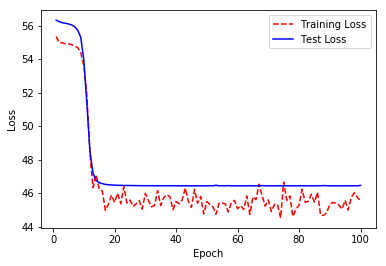

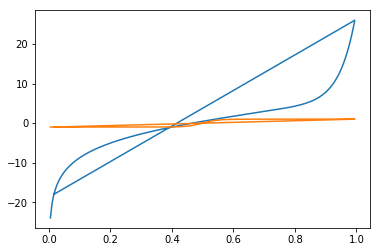

In [6]:
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 5.536964


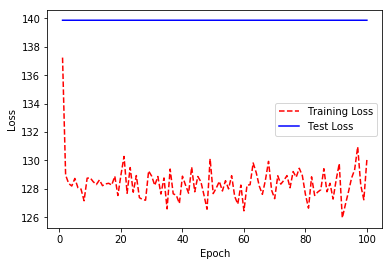

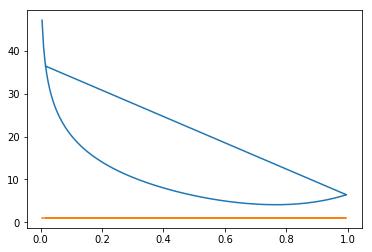

In [7]:
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 4.977932


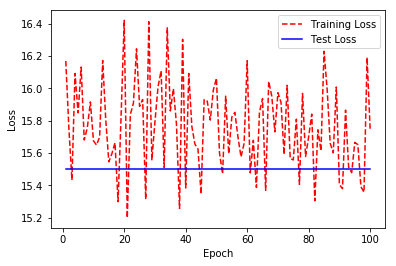

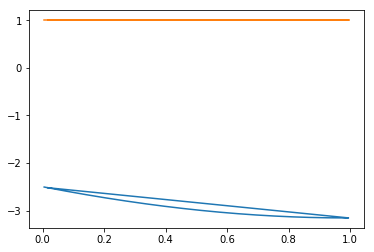

In [8]:
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]

#####################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

In [9]:
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(18, activation='relu'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(18, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')


Run Time : 8.220549


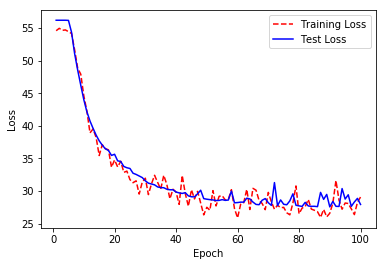

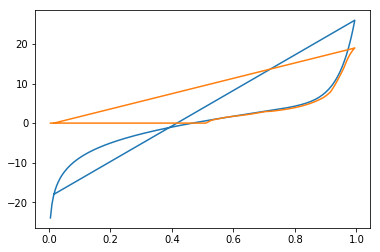

In [10]:
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 7.083013


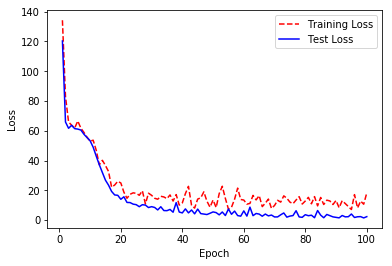

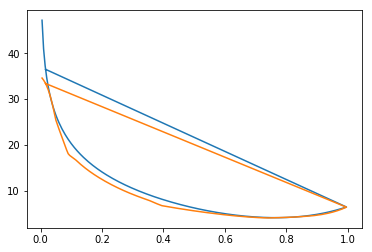

In [11]:
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 6.456751


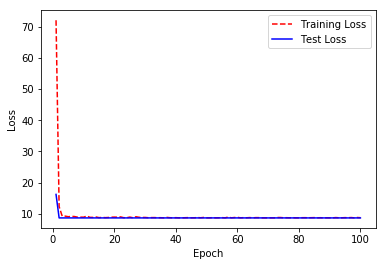

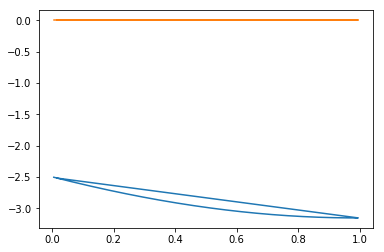

In [12]:
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

In [13]:
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')


Run Time : 9.611761


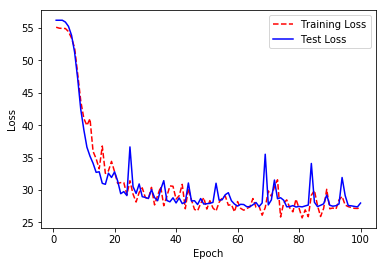

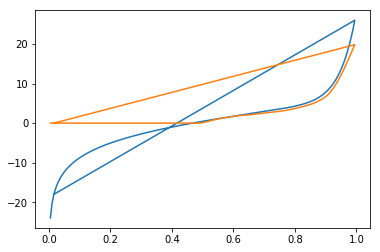

In [14]:
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 6.036184


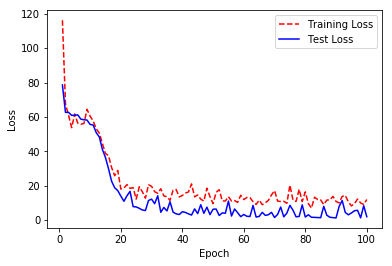

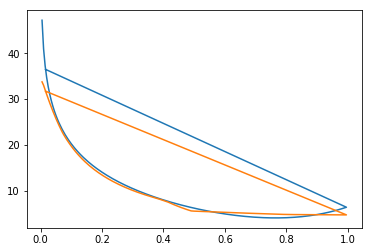

In [15]:
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 6.673628


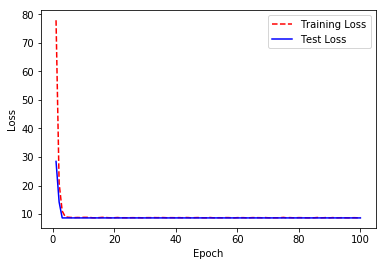

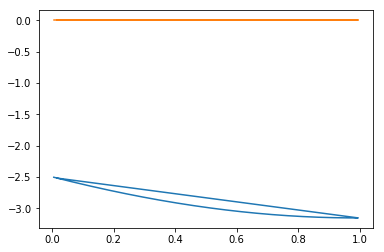

In [16]:
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

In [17]:
model = Sequential()
model.add(Dense(40, input_dim=input_dim, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')


Run Time : 7.002047


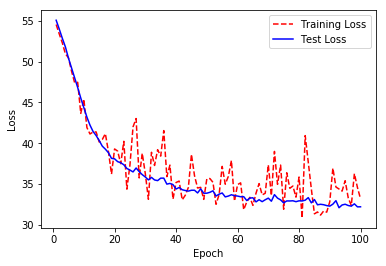

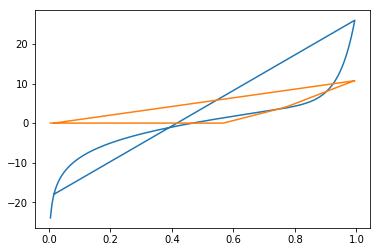

In [18]:
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 5.395602


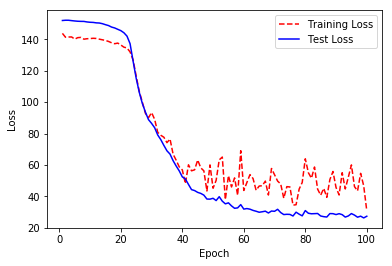

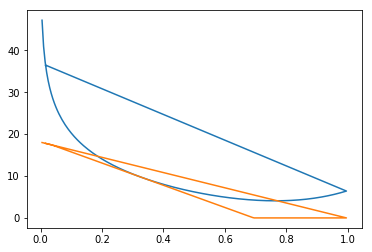

In [19]:
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 5.758145


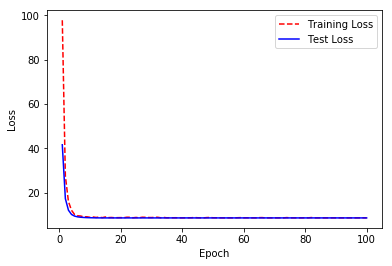

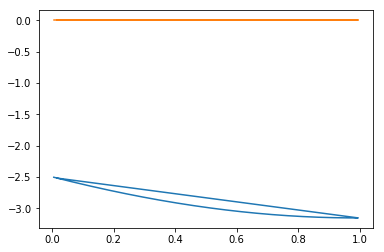

In [20]:
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

In [21]:
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='softplus'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(output_dim, activation='softplus'))
model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')



Run Time : 7.620957


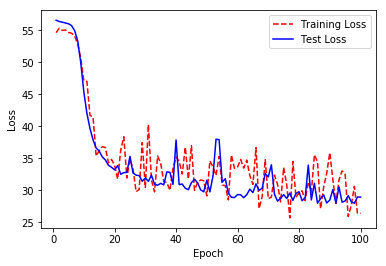

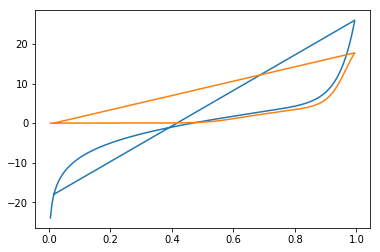

In [22]:
column=2
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 5.282185


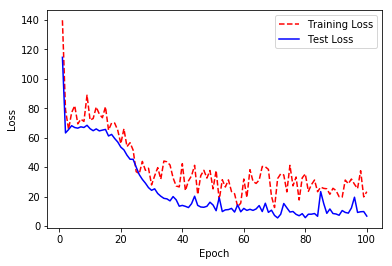

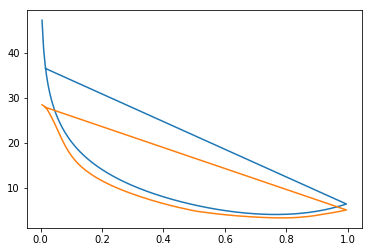

In [23]:
column=1
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

Run Time : 5.354067


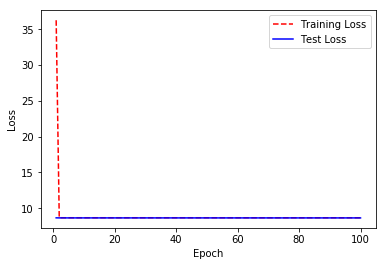

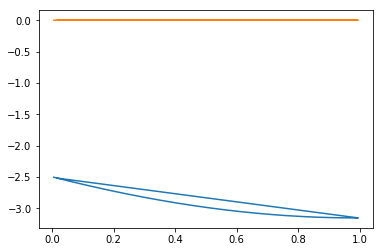

In [24]:
column=0
X_train=X_train_temp[:,0]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,0]
Y_test=Y_test_temp[:,column]


#######################################################################
start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)